In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

# 1 punto

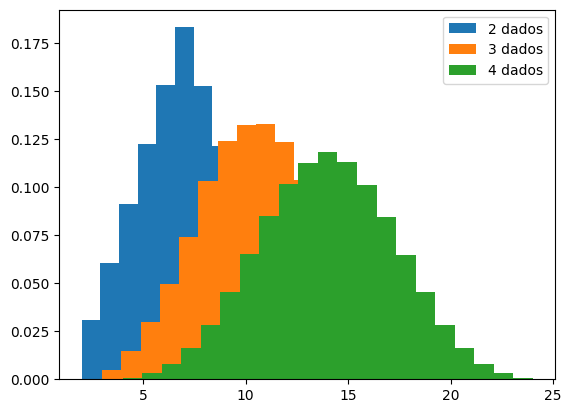

In [46]:
# Falta la segunda parte
#2.5
n = 1000000  #este es para el caso simultaneo, para el caso uno despues del otro ni idea.

d1, d2, d3, d4 = np.random.randint(1,7,[4,n]) #dado 1

suma_2 = d1 + d2 
suma_3 = d1 + d2 + d3   #sumo numeros para lso dados para saber cual es su suma
suma_4 = d1 + d2 + d3 + d4


plt.hist(suma_2, bins=11, density=True, label='2 dados') #acá hago el histograma de cada suma para mostrar microestados
plt.hist(suma_3, bins=16, density=True, label='3 dados')
plt.hist(suma_4, bins=21, density=True, label='4 dados')
plt.legend()
plt.show()


# 2 punto

In [54]:
# Buen trabajo
#5.0
R = 1000 #radio del colisionador debe ser +
l = 10000000 #numero de particulas

#aunque el colosionador sea circular en lap pequeña trayectoria donde van a colosionar podemos asumirlo como una linea recta
#por lo que la probabilidad de colosionar es la misma que la probabilidad de que colisione en uno linea, obviamente supniendo que el radio de este
#sea lo suficientemente grande para poder suponer esto, y teniendo encuenta todos los fenomenos de curvar las particuls pero al fin y al cabo
#cuando estas colisionen  van a colisionar en una linea recta, 

x1,y1 = np.random.uniform(-R,R,size=(2,l)) #dos vectores de n numeros, uno para x y otro para y, cara A
x2,y2 = np.random.uniform(-R,R,size=(2,l)) #cara B

r = np.arange(0,100,10) #radio de la particula

for i in r:
    exp_v = ((x1**2 + y1**2) < (R-i)**2) & ((x2**2 + y2**2) < (R-i)**2)  #eperimentos validos
    colisiones = np.vectorize(lambda x1,y1,x2,y2:True if math.dist([x1,y1],[x2,y2]) <= 2*i else False)\
        (x1[exp_v],y1[exp_v],x2[exp_v],y2[exp_v]) #probabilidad de colosionar en mascara  booleana, a la funcion le paso las cordenadas
# validas y evalua la condicion para que saber quien colosiona y quien no, verdadero col false no col

    probabilidad_colosion = colisiones.sum()/exp_v.sum()
    print('probabilidad: ', probabilidad_colosion)



probabilidad:  0.0
probabilidad:  0.000390996978168801
probabilidad:  0.0016425797728435363
probabilidad:  0.0037396284172214046
probabilidad:  0.006692951248981984
probabilidad:  0.010559977460587365
probabilidad:  0.015365796246116776
probabilidad:  0.021175831773801466
probabilidad:  0.02805237215145421
probabilidad:  0.03593017971473956


# 3 punto

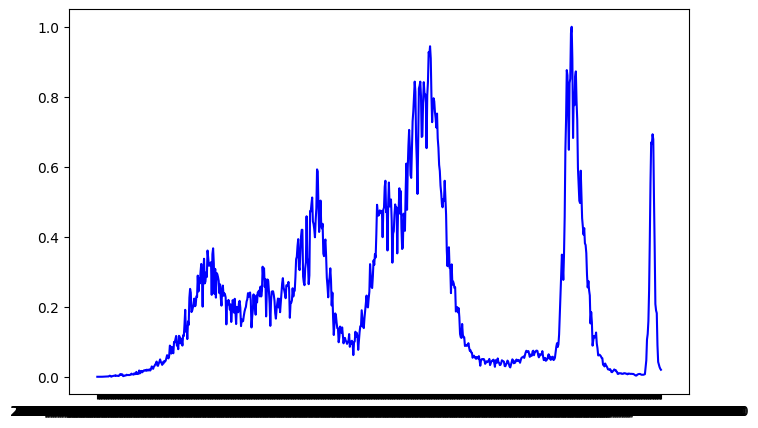

In [6]:
# No es el ajuste que se esta pidiendo
# 2.5
dfcovid = pd.read_csv('Colombia_COVID19_Coronavirus_casos_diarios.csv', index_col=False)
dfcovid['norm_new_cases']  = dfcovid['NUEVOS_CASOS']/dfcovid['NUEVOS_CASOS'].abs().max()

plt.figure(figsize=[8,5])
plt.plot(dfcovid['FECHA_ACTUALIZACION'], dfcovid['norm_new_cases'], color='b')

[0.0003615178957066238, 0.0003975097641968075, 0.00043721210279129585, 0.00048093939446242854, 0.0005290137836821446, 0.0005817605796496379, 0.0006395027334330108, 0.0007025542648823459, 0.0007712126599671342, 0.000845750312910887, 0.0009264051484301587, 0.001013370625340719, 0.0011067853915560986, 0.001206722930365417, 0.0013131816080145943, 0.0014260756030453625, 0.0015452272687351907, 0.0016703615502297931, 0.0018011031432948444, 0.0019369771327137086, 0.002077413869792791, 0.002221758819199966, 0.002369288001507096, 0.0025192294571408334, 0.002670790845590076, 0.0028231928702993573, 0.0029757077031016543, 0.0031277010114504856, 0.003278675625141211, 0.003428314387764428, 0.0035765193966837364, 0.0037234447111136808, 0.0038695197488035184, 0.004163075676043433, 0.004311339844109932, 0.004311220037791083, 0.004463821708908473, 0.004621785980565334, 0.004786969497727652, 0.0049613158228864005, 0.00514679258346917, 0.005345328730257535, 0.005558755414239895, 0.005788753507859361, 0.006

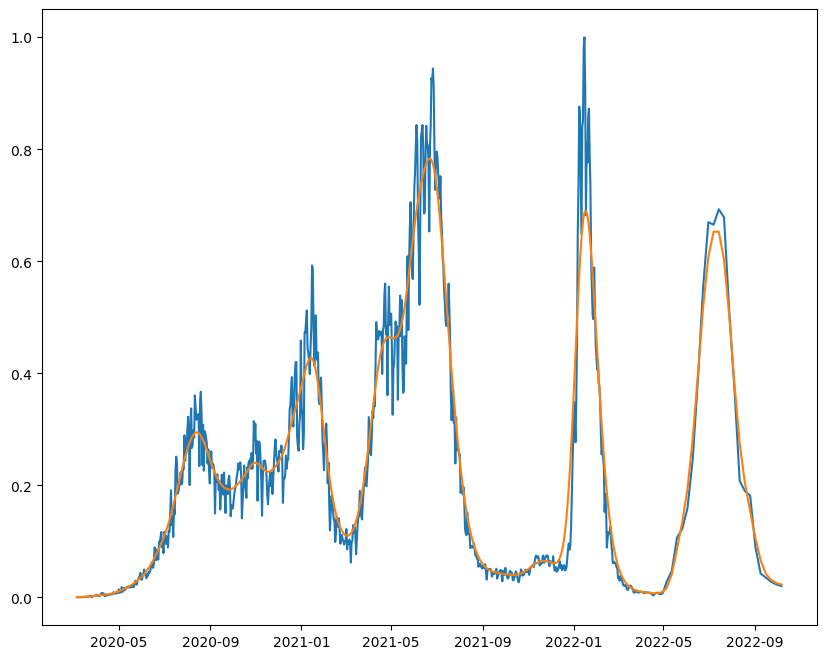

In [45]:
dfcovid["FECHA_NUEVA"]=pd.to_datetime(dfcovid["FECHA_ACTUALIZACION"])
#x=dfcovid["FECHA_NUEVA"].values
new2=[]
sigma = 18/2
for date in sorted(dfcovid["FECHA_NUEVA"]): #aplico kernel sobre los dartos
    #val = ((dfcovid["FECHA_NUEVA"]-date).apply(lambda x: x.days))
    #print(abs(val))
    if 1 <= 1:
        dfcovid["gauss"]= (4/3)*np.exp(1  -(((dfcovid["FECHA_NUEVA"]-date).apply(lambda x: x.days))**2)/(2*(sigma**2))) #sin el exp no me funciona

        dfcovid["gauss"] /=dfcovid["gauss"].sum()
        new2.append((dfcovid["norm_new_cases"]*dfcovid["gauss"]).sum())
    else:
        new2.append(0)


dfcovid["new2"]=new2 #agrego la columna con los datos del kernel

print(new2)
plt.figure(figsize=(10,8)) #grafico los datos
plt.plot(dfcovid["FECHA_NUEVA"],dfcovid["norm_new_cases"])
plt.plot(dfcovid["FECHA_NUEVA"],dfcovid["new2"])